In [1]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import os
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display, Image
from PIL import Image
import pickle
import time
import shutil


In [2]:
image_path = r"D:\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\Data\Plant_leave_diseases_dataset_with_augmentation\Grape___Black_rot\image (1172).JPG"

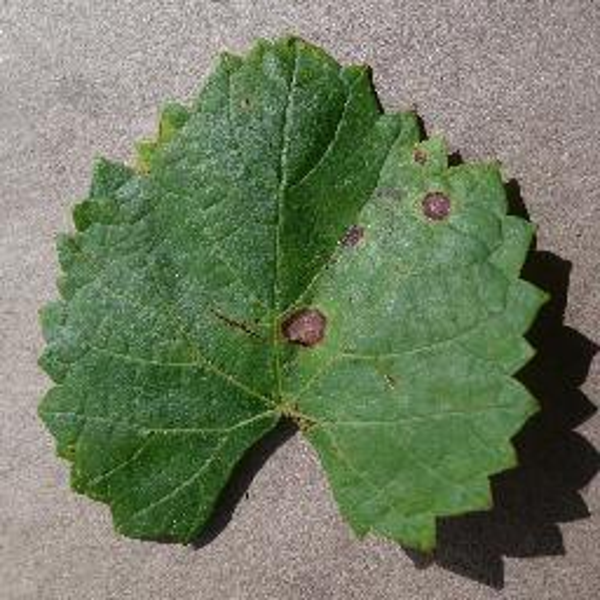

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [4]:
original_image = Image.open(image_path)
new_width = 600
new_height = 600
resized_image = original_image.resize((new_width, new_height))
display(resized_image)

leaf_classifier_path = r"D:\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\Classification_models\leaf_classifier.pkl"
with open(leaf_classifier_path, 'rb') as file:
    leaf_classifier = pickle.load(file)

leaf_category = leaf_classifier.predict(image_path).json()

for key,value in leaf_category.items():
    if key == 'predictions':
        result1 = value[0]
        for key,value in result1.items():
            if key == 'predictions':
                result2 = value[0]
                for key,value in result2.items():
                    if key == 'class':
                        leaf_cat = value
                    elif key == 'confidence':
                        confidence = value

if leaf_cat == 'No Leaf':
    print(f"No leaf detected in given image with {confidence*100} confidence")
else:
    print(f"The given input image belongs to category {leaf_cat} with {confidence*100}% confidence")
    decision_dict = {

       "Apple":["D:\\J-Com\\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\\Disease_detection_model\\Apple_disease_detection\\apple_runs\\detect\\train\\weights\\best.pt"],
       "Corn":["D:\\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\\Disease_detection_model\\Corn_diasease_detection\\corn_runs\\detect\\train\\weights\\best.pt"],
       "Grape": ["D:\\J-Com\\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\\Disease_detection_model\\Grape_disease_detection\\grapes_runs\\detect\\train\\weights\\best.pt"],
       "Potato":["D:\\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\\Disease_detection_model\Potato_disease_detection\potatao_runs\detect\\train\\weights\\best.pt"]

     }

    for key,value in decision_dict.items():
        if key == leaf_cat:
            decision = value
            model = YOLO(value[0])
            model.load(value[0])
            model.predict(image_path,save=True)

    time.sleep(5)

    for img in os.listdir(r"D:\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\runs\detect\predict"):
        output_image_path = "D:\\J-Com\\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\\runs\detect\\predict" + f"\\{img}"
        original_image = Image.open(output_image_path)
        new_width = 600
        new_height = 600
        resized_image = original_image.resize((new_width, new_height))
        display(resized_image)

    directory_to_delete = r"D:\J-Com\PlantClassification_PlantHealthClasiification_LeafDiseaseDetection\runs"
    shutil.rmtree(directory_to_delete)
